### 1. Sample Image

PNG
P
(1280, 856)


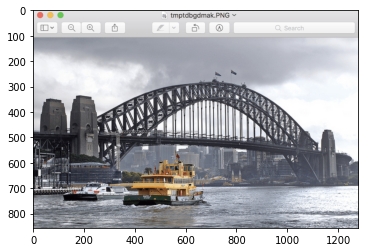

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

#load image 
image = Image.open('/home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/Image Preparagation/The-Sydney-Harbor-Bridge-Photograph-Loaded-From-File.png')
print(image.format)
print(image.mode)
print(image.size)

plt.imshow(image)

### 2. Normalize Pixel Values
+ Đối với hầu hết dữ liệu hình ảnh, giá trị pixel là số nguyên có giá trị từ 0 đến 255.
+ Mạng nơ-ron xử lý đầu vào bằng cách sử dụng giá trị trọng số nhỏ và đầu vào có giá trị số nguyên lớn có thể làm gián đoạn hoặc làm chậm quá trình học. 
+ Do đó, thông lệ tốt là chuẩn hóa các giá trị pixel để mỗi giá trị pixel có giá trị từ 0 đến 1. Việc hình ảnh có giá trị pixel trong phạm vi 0-1 là hợp lệ và hình ảnh có thể được xem bình thường.
+ Điều này có thể đạt được bằng cách chia tất cả các giá trị pixel cho giá trị pixel lớn nhất;

In [16]:
from numpy import asarray, float64
import numpy as np
import sys
from PIL import Image
image_path_1 = '/home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/Image Preparagation/Sydney-Opera-House_color.jpg'
image_path_2 = '/home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/Image Preparagation/The-Sydney-Harbor-Bridge-Photograph-Loaded-From-File.png'
image_paths = [image_path_1, image_path_2]

min = sys.maxsize
max = -sys.maxsize

pixels = []

#load image
for path in image_paths:
    image = Image.open(path)
    pixels_image = asarray(image)
    if min > pixels_image.min():
        min = pixels_image.min()
    if max < pixels_image.max():
        max = pixels_image.max()
    pixels_image.astype(np.float64)
    print(f"max and min pixels: {max} and {min}")
    norm_image = pixels_image/255.0
    print(f"max and min normalize pixels: {norm_image.max()} and {norm_image.min()}")



max and min pixels: 255 and 0
max and min normalize pixels: 1.0 and 0.0
max and min pixels: 255 and 0
max and min normalize pixels: 0.6196078431372549 and 0.0


### 3. Center Pixel Values
+ Một kỹ thuật chuẩn bị dữ liệu phổ biến cho dữ liệu hình ảnh là lấy giá trị pixel trừ đi giá trị trung bình. Cách tiếp cận này được gọi là căn giữa, vì sự phân bố của các giá trị pixel được tập trung vào giá trị bằng không
+ Căn giữa có thể được thực hiện trước hoặc sau khi chuẩn hóa. Căn giữa các pixel sau đó chuẩn hóa sẽ có nghĩa là các giá trị pixel sẽ được căn giữa gần bằng 0,5 và nằm trong phạm vi 0-1

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
from keras.preprocessing.image import ImageDataGenerator

# loading the dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
print(trainX.shape)

2022-08-07 10:44:55.745249: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-07 10:44:55.745287: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(60000, 28, 28)


In [28]:
# reshaping the dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1 # 28x28x1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

# creating image data generator for centering images
datagen = ImageDataGenerator(featurewise_center=True,
                            rescale=1./255,
                            horizontal_flip=True) # norm
  
# calculating the mean of the training dataset
datagen.fit(trainX)

In [29]:
# preparing iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator),
                                     len(test_iterator)))

Batches train=938, test=157


In [32]:
# defining the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height,
                                                             channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

              # fitting the model with the generator
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator),
                    epochs=5)
# evaluating the model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator),
                                  verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))          

Epoch 1/5


/tmp/ipykernel_20124/1809175660.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator),


938/938 [==============================] - 24s 26ms/step - loss: 0.3060 - accuracy: 0.9038
Epoch 2/5
938/938 [==============================] - 25s 26ms/step - loss: 0.1051 - accuracy: 0.9665
Epoch 3/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0746 - accuracy: 0.9769
Epoch 4/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0589 - accuracy: 0.9813
Epoch 5/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0488 - accuracy: 0.9843


/tmp/ipykernel_20124/1809175660.py:20: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator),


Test Accuracy: 98.180


### 4. Standardize Pixel Values

In [33]:
from PIL import Image
import matplotlib.pyplot as plt

#load image 
image = Image.open('/home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/Image Preparagation/The-Sydney-Harbor-Bridge-Photograph-Loaded-From-File.png')
pixels = asarray(image)
# convert from integer to float
pixels.astype(np.float64)
# Caculate global mean and Standard dedviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std # cong thuc standard 
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))


Mean: 49.571, Standard Deviation: 37.351
Mean: -0.000, Standard Deviation: 1.000


### **Chuẩn hóa điểm ảnh hình ảnh trong Keras**

In [34]:
# import required modules
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

In [35]:
# loading the dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
  
# reshaping the dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [36]:
# creating the image data generator to standardize images
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True)

In [37]:
# calculating the mean on the training dataset
datagen.fit(trainX)
  
# preparing iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator),
                                     len(test_iterator)))

Batches train=938, test=157


In [38]:
# defining the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(width, height, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
  
# compiling the  model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
  
# fitting the model with the generator
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator),
                    epochs=10)
  
# evaluating the model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator),
                                  verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

Epoch 1/5


/tmp/ipykernel_20124/214720700.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator),


938/938 [==============================] - 29s 30ms/step - loss: 0.1503 - accuracy: 0.9541
Epoch 2/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0483 - accuracy: 0.9852
Epoch 3/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0340 - accuracy: 0.9896
Epoch 4/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 5/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0196 - accuracy: 0.9937


/tmp/ipykernel_20124/214720700.py:21: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator),


Test Accuracy: 98.980
